<a href="https://colab.research.google.com/github/kavindukalinga/Product-Detection-in-Densely-Packed-Scenes/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

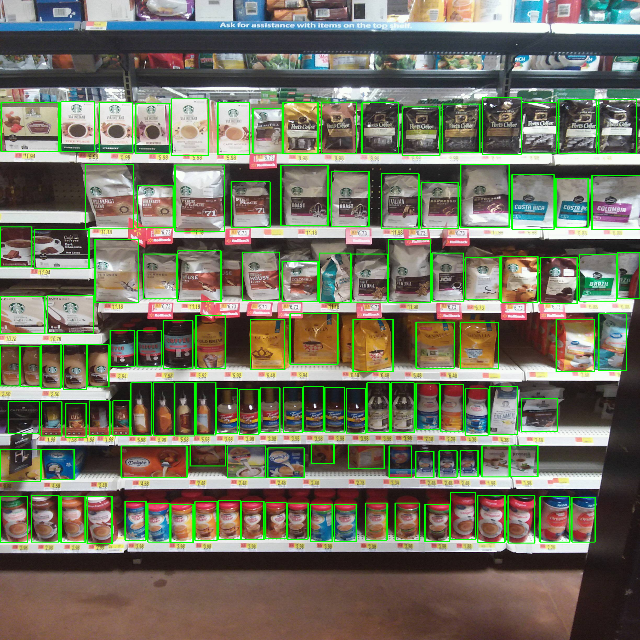

In [1]:
# visulalize dataset

import cv2
from PIL import Image

image = cv2.imread("/content/drive/MyDrive/dataset3/images/test/test_0.jpg")
with open("/content/drive/MyDrive/dataset3/labels/test/test_0.txt") as f:
    lines = f.read().strip().split("\n")
    for line in lines:
        # Split the line by spaces to separate the values
        values = line.split()

        # Convert the values to floats
        class_id = int(values[0])
        center_x = float(values[1])
        center_y = float(values[2])
        width = float(values[3])
        height = float(values[4])

        # Calculate the coordinates
        image_height, image_width = image.shape[:2]

        x1 = int((center_x - width / 2) * image_width)
        y1 = int((center_y - height / 2) * image_height)
        x2 = int((center_x + width / 2) * image_width)
        y2 = int((center_y + height / 2) * image_height)

        cv2.rectangle(image, (x1,y1), (x2,y2), (0,255,0), 4)

Image.fromarray(cv2.resize(image[:,:,::-1], (640, 640)))

In [3]:
!pip install super-gradients roboflow supervision opencv-python fastapi kaleido python-multipart uvicorn tensorflow
!DEBIAN_FRONTEND=noninteractive apt update -y && apt install -y libglu1 libglib2.0-0 libsm6 libxrender1 libxext6 git build-essential
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
19 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
N

In [5]:
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

BATCH_SIZE = 1
CLASSES = ['product']
CLASSES += [str(i) for i in range(80 - len(CLASSES))]

dataset_params = {
    'data_dir': "/content/drive/MyDrive/dataset3",
    'train_images_dir':'images/train',
    'train_labels_dir':'labels/train',
    'val_images_dir':'images/val',
    'val_labels_dir':'labels/val',
    'test_images_dir':'images/test',
    'test_labels_dir':'labels/test',
    'classes': CLASSES
}

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-10-23 15:42:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 989/989 [00:03<00:00, 267.47it/s]
[2023-10-23 15:42:17] WARNING - yolo_format_detection.py - 10 images are note associated to any label file
[2023-10-23 15:42:17] WARNING - yolo_format_detection.py - As a consequence, 101/111 images and 101/101 label files will be used.
[2023-10-23 15:42:17] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 101/101 [00:00<00:00, 198.37it/s]
[2023-10-23 15:42:18] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 100/100 [00:00<00:00, 3

In [6]:
import torch
from super_gradients.training import models
from super_gradients.training import Trainer

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.get('yolo_nas_s', pretrained_weights="coco").to(DEVICE)
trainer = Trainer(experiment_name="SKU110K", ckpt_root_dir="./weights")

[2023-10-23 15:42:29] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:00<00:00, 104MB/s]
[2023-10-23 15:42:30] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [7]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

MAX_EPOCHS = 15

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [8]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-10-23 15:42:57] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231023_154257_275476`
[2023-10-23 15:42:57] INFO - sg_trainer.py - Checkpoints directory: ./weights/SKU110K/RUN_20231023_154257_275476
[2023-10-23 15:42:57] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)


The console stream is now moved to ./weights/SKU110K/RUN_20231023_154257_275476/console_Oct23_15_42_57.txt


[2023-10-23 15:42:59] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 989        (len(train_set))
    - Batch size per GPU:           1          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             1          (num_gpus * batch_size)
    - Effective Batch size:         1          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         989        (len(train_loader))
    - Gradient updates per epoch:   989        (len(train_loader) / batch_accumulate)

[2023-10-23 15:42:59] INFO - sg_trainer.py - Started training for 15 epochs (0/14)

Validating: 100%|██████████| 101/101 [00:19<00:00,  5.28it/s]
[2023-10-23 15:55:26] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 15:55:26] INFO

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4518
│   ├── Ppyoloeloss/loss_iou = 0.4932
│   ├── Ppyoloeloss/loss_dfl = 1.5505
│   └── Ppyoloeloss/loss = 3.46
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0592
    ├── Ppyoloeloss/loss_iou = 0.4221
    ├── Ppyoloeloss/loss_dfl = 1.1761
    ├── Ppyoloeloss/loss = 2.7025
    ├── Precision@0.50 = 0.2221
    ├── Recall@0.50 = 0.3018
    ├── Map@0.50 = 0.1648
    └── F1@0.50 = 0.2559



Validating epoch 1: 100%|██████████| 101/101 [00:20<00:00,  5.02it/s]
[2023-10-23 16:07:44] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 16:07:44] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5528361201286316


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8047
│   │   ├── Epoch N-1      = 1.4518 (↘ -0.6471)
│   │   └── Best until now = 1.4518 (↘ -0.6471)
│   ├── Ppyoloeloss/loss_iou = 0.3584
│   │   ├── Epoch N-1      = 0.4932 (↘ -0.1348)
│   │   └── Best until now = 0.4932 (↘ -0.1348)
│   ├── Ppyoloeloss/loss_dfl = 1.0608
│   │   ├── Epoch N-1      = 1.5505 (↘ -0.4897)
│   │   └── Best until now = 1.5505 (↘ -0.4897)
│   └── Ppyoloeloss/loss = 2.2312
│       ├── Epoch N-1      = 3.46   (↘ -1.2288)
│       └── Best until now = 3.46   (↘ -1.2288)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7738
    │   ├── Epoch N-1      = 1.0592 (↘ -0.2853)
    │   └── Best until now = 1.0592 (↘ -0.2853)
    ├── Ppyoloeloss/loss_iou = 0.2659
    │   ├── Epoch N-1      = 0.4221 (↘ -0.1563)
    │   └── Best until now = 0.4221 (↘ -0.1563)
    ├── Ppyoloeloss/loss_dfl = 0.8184
    │   ├── Epoch N-1      = 1.1761 (↘ -0.3577)
    │   └── Best until now = 1.1761 (↘ -0.3577)
    ├── Ppyoloeloss/lo

Validating epoch 2: 100%|██████████| 101/101 [00:19<00:00,  5.10it/s]
[2023-10-23 16:19:46] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 16:19:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6012994647026062


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7835
│   │   ├── Epoch N-1      = 0.8047 (↘ -0.0213)
│   │   └── Best until now = 0.8047 (↘ -0.0213)
│   ├── Ppyoloeloss/loss_iou = 0.3244
│   │   ├── Epoch N-1      = 0.3584 (↘ -0.0341)
│   │   └── Best until now = 0.3584 (↘ -0.0341)
│   ├── Ppyoloeloss/loss_dfl = 0.9989
│   │   ├── Epoch N-1      = 1.0608 (↘ -0.0619)
│   │   └── Best until now = 1.0608 (↘ -0.0619)
│   └── Ppyoloeloss/loss = 2.0938
│       ├── Epoch N-1      = 2.2312 (↘ -0.1374)
│       └── Best until now = 2.2312 (↘ -0.1374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.762
    │   ├── Epoch N-1      = 0.7738 (↘ -0.0119)
    │   └── Best until now = 0.7738 (↘ -0.0119)
    ├── Ppyoloeloss/loss_iou = 0.2444
    │   ├── Epoch N-1      = 0.2659 (↘ -0.0214)
    │   └── Best until now = 0.2659 (↘ -0.0214)
    ├── Ppyoloeloss/loss_dfl = 0.7956
    │   ├── Epoch N-1      = 0.8184 (↘ -0.0228)
    │   └── Best until now = 0.8184 (↘ -0.0228)
    ├── Ppyoloeloss/los

Validating epoch 3: 100%|██████████| 101/101 [00:19<00:00,  5.08it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7875
│   │   ├── Epoch N-1      = 0.7835 (↗ 0.0041)
│   │   └── Best until now = 0.7835 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.3169
│   │   ├── Epoch N-1      = 0.3244 (↘ -0.0074)
│   │   └── Best until now = 0.3244 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.9833
│   │   ├── Epoch N-1      = 0.9989 (↘ -0.0156)
│   │   └── Best until now = 0.9989 (↘ -0.0156)
│   └── Ppyoloeloss/loss = 2.0715
│       ├── Epoch N-1      = 2.0938 (↘ -0.0223)
│       └── Best until now = 2.0938 (↘ -0.0223)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8039
    │   ├── Epoch N-1      = 0.762  (↗ 0.0419)
    │   └── Best until now = 0.762  (↗ 0.0419)
    ├── Ppyoloeloss/loss_iou = 0.2514
    │   ├── Epoch N-1      = 0.2444 (↗ 0.007)
    │   └── Best until now = 0.2444 (↗ 0.007)
    ├── Ppyoloeloss/loss_dfl = 0.8175
    │   ├── Epoch N-1      = 0.7956 (↗ 0.0219)
    │   └── Best until now = 0.7956 (↗ 0.0219)
    ├── Ppyoloeloss/loss = 1.841

Validating epoch 4: 100%|██████████| 101/101 [00:18<00:00,  5.44it/s]
[2023-10-23 16:43:58] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 16:43:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6249300241470337


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.78
│   │   ├── Epoch N-1      = 0.7875 (↘ -0.0075)
│   │   └── Best until now = 0.7835 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_iou = 0.308
│   │   ├── Epoch N-1      = 0.3169 (↘ -0.009)
│   │   └── Best until now = 0.3169 (↘ -0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.9584
│   │   ├── Epoch N-1      = 0.9833 (↘ -0.0249)
│   │   └── Best until now = 0.9833 (↘ -0.0249)
│   └── Ppyoloeloss/loss = 2.0292
│       ├── Epoch N-1      = 2.0715 (↘ -0.0423)
│       └── Best until now = 2.0715 (↘ -0.0423)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7679
    │   ├── Epoch N-1      = 0.8039 (↘ -0.036)
    │   └── Best until now = 0.762  (↗ 0.0059)
    ├── Ppyoloeloss/loss_iou = 0.2469
    │   ├── Epoch N-1      = 0.2514 (↘ -0.0045)
    │   └── Best until now = 0.2444 (↗ 0.0024)
    ├── Ppyoloeloss/loss_dfl = 0.792
    │   ├── Epoch N-1      = 0.8175 (↘ -0.0255)
    │   └── Best until now = 0.7956 (↘ -0.0036)
    ├── Ppyoloeloss/loss = 1.78

Validating epoch 5: 100%|██████████| 101/101 [00:19<00:00,  5.14it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7749
│   │   ├── Epoch N-1      = 0.78   (↘ -0.0051)
│   │   └── Best until now = 0.78   (↘ -0.0051)
│   ├── Ppyoloeloss/loss_iou = 0.3014
│   │   ├── Epoch N-1      = 0.308  (↘ -0.0065)
│   │   └── Best until now = 0.308  (↘ -0.0065)
│   ├── Ppyoloeloss/loss_dfl = 0.9408
│   │   ├── Epoch N-1      = 0.9584 (↘ -0.0177)
│   │   └── Best until now = 0.9584 (↘ -0.0177)
│   └── Ppyoloeloss/loss = 1.9989
│       ├── Epoch N-1      = 2.0292 (↘ -0.0303)
│       └── Best until now = 2.0292 (↘ -0.0303)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7661
    │   ├── Epoch N-1      = 0.7679 (↘ -0.0017)
    │   └── Best until now = 0.762  (↗ 0.0042)
    ├── Ppyoloeloss/loss_iou = 0.2358
    │   ├── Epoch N-1      = 0.2469 (↘ -0.0111)
    │   └── Best until now = 0.2444 (↘ -0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.7794
    │   ├── Epoch N-1      = 0.792  (↘ -0.0126)
    │   └── Best until now = 0.792  (↘ -0.0126)
    ├── Ppyoloeloss/los

Validating epoch 6: 100%|██████████| 101/101 [00:19<00:00,  5.18it/s]
[2023-10-23 17:07:46] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 17:07:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6487711071968079


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7692
│   │   ├── Epoch N-1      = 0.7749 (↘ -0.0057)
│   │   └── Best until now = 0.7749 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.2933
│   │   ├── Epoch N-1      = 0.3014 (↘ -0.0082)
│   │   └── Best until now = 0.3014 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.9239
│   │   ├── Epoch N-1      = 0.9408 (↘ -0.0169)
│   │   └── Best until now = 0.9408 (↘ -0.0169)
│   └── Ppyoloeloss/loss = 1.9644
│       ├── Epoch N-1      = 1.9989 (↘ -0.0345)
│       └── Best until now = 1.9989 (↘ -0.0345)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7386
    │   ├── Epoch N-1      = 0.7661 (↘ -0.0276)
    │   └── Best until now = 0.762  (↘ -0.0234)
    ├── Ppyoloeloss/loss_iou = 0.2354
    │   ├── Epoch N-1      = 0.2358 (↘ -0.0005)
    │   └── Best until now = 0.2358 (↘ -0.0005)
    ├── Ppyoloeloss/loss_dfl = 0.7732
    │   ├── Epoch N-1      = 0.7794 (↘ -0.0062)
    │   └── Best until now = 0.7794 (↘ -0.0062)
    ├── Ppyoloeloss/lo

Validating epoch 7: 100%|██████████| 101/101 [00:20<00:00,  4.96it/s]
[2023-10-23 17:20:00] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 17:20:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6807417869567871


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7614
│   │   ├── Epoch N-1      = 0.7692 (↘ -0.0078)
│   │   └── Best until now = 0.7692 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_iou = 0.2886
│   │   ├── Epoch N-1      = 0.2933 (↘ -0.0046)
│   │   └── Best until now = 0.2933 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.9208
│   │   ├── Epoch N-1      = 0.9239 (↘ -0.0031)
│   │   └── Best until now = 0.9239 (↘ -0.0031)
│   └── Ppyoloeloss/loss = 1.9434
│       ├── Epoch N-1      = 1.9644 (↘ -0.021)
│       └── Best until now = 1.9644 (↘ -0.021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7365
    │   ├── Epoch N-1      = 0.7386 (↘ -0.0021)
    │   └── Best until now = 0.7386 (↘ -0.0021)
    ├── Ppyoloeloss/loss_iou = 0.2284
    │   ├── Epoch N-1      = 0.2354 (↘ -0.0069)
    │   └── Best until now = 0.2354 (↘ -0.0069)
    ├── Ppyoloeloss/loss_dfl = 0.7648
    │   ├── Epoch N-1      = 0.7732 (↘ -0.0084)
    │   └── Best until now = 0.7732 (↘ -0.0084)
    ├── Ppyoloeloss/loss

Validating epoch 8: 100%|██████████| 101/101 [00:19<00:00,  5.12it/s]
[2023-10-23 17:32:00] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 17:32:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6952463984489441


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7581
│   │   ├── Epoch N-1      = 0.7614 (↘ -0.0033)
│   │   └── Best until now = 0.7614 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.2857
│   │   ├── Epoch N-1      = 0.2886 (↘ -0.003)
│   │   └── Best until now = 0.2886 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.9028
│   │   ├── Epoch N-1      = 0.9208 (↘ -0.018)
│   │   └── Best until now = 0.9208 (↘ -0.018)
│   └── Ppyoloeloss/loss = 1.9237
│       ├── Epoch N-1      = 1.9434 (↘ -0.0197)
│       └── Best until now = 1.9434 (↘ -0.0197)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7297
    │   ├── Epoch N-1      = 0.7365 (↘ -0.0068)
    │   └── Best until now = 0.7365 (↘ -0.0068)
    ├── Ppyoloeloss/loss_iou = 0.224
    │   ├── Epoch N-1      = 0.2284 (↘ -0.0044)
    │   └── Best until now = 0.2284 (↘ -0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.7485
    │   ├── Epoch N-1      = 0.7648 (↘ -0.0163)
    │   └── Best until now = 0.7648 (↘ -0.0163)
    ├── Ppyoloeloss/loss = 

Validating epoch 9: 100%|██████████| 101/101 [00:23<00:00,  4.21it/s]
[2023-10-23 17:44:03] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 17:44:03] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7108457088470459


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7506
│   │   ├── Epoch N-1      = 0.7581 (↘ -0.0075)
│   │   └── Best until now = 0.7581 (↘ -0.0075)
│   ├── Ppyoloeloss/loss_iou = 0.2775
│   │   ├── Epoch N-1      = 0.2857 (↘ -0.0082)
│   │   └── Best until now = 0.2857 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.8807
│   │   ├── Epoch N-1      = 0.9028 (↘ -0.022)
│   │   └── Best until now = 0.9028 (↘ -0.022)
│   └── Ppyoloeloss/loss = 1.8848
│       ├── Epoch N-1      = 1.9237 (↘ -0.039)
│       └── Best until now = 1.9237 (↘ -0.039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7476
    │   ├── Epoch N-1      = 0.7297 (↗ 0.0179)
    │   └── Best until now = 0.7297 (↗ 0.0179)
    ├── Ppyoloeloss/loss_iou = 0.2232
    │   ├── Epoch N-1      = 0.224  (↘ -0.0008)
    │   └── Best until now = 0.224  (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.7434
    │   ├── Epoch N-1      = 0.7485 (↘ -0.0051)
    │   └── Best until now = 0.7485 (↘ -0.0051)
    ├── Ppyoloeloss/loss = 1

Validating epoch 10: 100%|██████████| 101/101 [00:18<00:00,  5.38it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7436
│   │   ├── Epoch N-1      = 0.7506 (↘ -0.007)
│   │   └── Best until now = 0.7506 (↘ -0.007)
│   ├── Ppyoloeloss/loss_iou = 0.2731
│   │   ├── Epoch N-1      = 0.2775 (↘ -0.0044)
│   │   └── Best until now = 0.2775 (↘ -0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.8731
│   │   ├── Epoch N-1      = 0.8807 (↘ -0.0076)
│   │   └── Best until now = 0.8807 (↘ -0.0076)
│   └── Ppyoloeloss/loss = 1.8629
│       ├── Epoch N-1      = 1.8848 (↘ -0.0218)
│       └── Best until now = 1.8848 (↘ -0.0218)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7263
    │   ├── Epoch N-1      = 0.7476 (↘ -0.0213)
    │   └── Best until now = 0.7297 (↘ -0.0034)
    ├── Ppyoloeloss/loss_iou = 0.2185
    │   ├── Epoch N-1      = 0.2232 (↘ -0.0047)
    │   └── Best until now = 0.2232 (↘ -0.0047)
    ├── Ppyoloeloss/loss_dfl = 0.737
    │   ├── Epoch N-1      = 0.7434 (↘ -0.0063)
    │   └── Best until now = 0.7434 (↘ -0.0063)
    ├── Ppyoloeloss/loss

Validating epoch 11: 100%|██████████| 101/101 [00:19<00:00,  5.10it/s]
[2023-10-23 18:07:59] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 18:07:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.720872163772583


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7393
│   │   ├── Epoch N-1      = 0.7436 (↘ -0.0043)
│   │   └── Best until now = 0.7436 (↘ -0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.2697
│   │   ├── Epoch N-1      = 0.2731 (↘ -0.0034)
│   │   └── Best until now = 0.2731 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.8592
│   │   ├── Epoch N-1      = 0.8731 (↘ -0.0139)
│   │   └── Best until now = 0.8731 (↘ -0.0139)
│   └── Ppyoloeloss/loss = 1.8431
│       ├── Epoch N-1      = 1.8629 (↘ -0.0198)
│       └── Best until now = 1.8629 (↘ -0.0198)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7121
    │   ├── Epoch N-1      = 0.7263 (↘ -0.0142)
    │   └── Best until now = 0.7263 (↘ -0.0142)
    ├── Ppyoloeloss/loss_iou = 0.2183
    │   ├── Epoch N-1      = 0.2185 (↘ -0.0002)
    │   └── Best until now = 0.2185 (↘ -0.0002)
    ├── Ppyoloeloss/loss_dfl = 0.7357
    │   ├── Epoch N-1      = 0.737  (↘ -0.0013)
    │   └── Best until now = 0.737  (↘ -0.0013)
    ├── Ppyoloeloss/l

Validating epoch 12: 100%|██████████| 101/101 [00:18<00:00,  5.45it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7286
│   │   ├── Epoch N-1      = 0.7393 (↘ -0.0107)
│   │   └── Best until now = 0.7393 (↘ -0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.2598
│   │   ├── Epoch N-1      = 0.2697 (↘ -0.0099)
│   │   └── Best until now = 0.2697 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.8431
│   │   ├── Epoch N-1      = 0.8592 (↘ -0.0161)
│   │   └── Best until now = 0.8592 (↘ -0.0161)
│   └── Ppyoloeloss/loss = 1.7998
│       ├── Epoch N-1      = 1.8431 (↘ -0.0434)
│       └── Best until now = 1.8431 (↘ -0.0434)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7131
    │   ├── Epoch N-1      = 0.7121 (↗ 0.001)
    │   └── Best until now = 0.7121 (↗ 0.001)
    ├── Ppyoloeloss/loss_iou = 0.2161
    │   ├── Epoch N-1      = 0.2183 (↘ -0.0022)
    │   └── Best until now = 0.2183 (↘ -0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.7334
    │   ├── Epoch N-1      = 0.7357 (↘ -0.0023)
    │   └── Best until now = 0.7357 (↘ -0.0023)
    ├── Ppyoloeloss/loss 

Validating epoch 13: 100%|██████████| 101/101 [00:21<00:00,  4.78it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7273
│   │   ├── Epoch N-1      = 0.7286 (↘ -0.0014)
│   │   └── Best until now = 0.7286 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_iou = 0.2612
│   │   ├── Epoch N-1      = 0.2598 (↗ 0.0014)
│   │   └── Best until now = 0.2598 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.8372
│   │   ├── Epoch N-1      = 0.8431 (↘ -0.0059)
│   │   └── Best until now = 0.8431 (↘ -0.0059)
│   └── Ppyoloeloss/loss = 1.7988
│       ├── Epoch N-1      = 1.7998 (↘ -0.0009)
│       └── Best until now = 1.7998 (↘ -0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7064
    │   ├── Epoch N-1      = 0.7131 (↘ -0.0067)
    │   └── Best until now = 0.7121 (↘ -0.0057)
    ├── Ppyoloeloss/loss_iou = 0.2118
    │   ├── Epoch N-1      = 0.2161 (↘ -0.0043)
    │   └── Best until now = 0.2161 (↘ -0.0043)
    ├── Ppyoloeloss/loss_dfl = 0.7269
    │   ├── Epoch N-1      = 0.7334 (↘ -0.0065)
    │   └── Best until now = 0.7334 (↘ -0.0065)
    ├── Ppyoloeloss/los

Validating epoch 14: 100%|██████████| 101/101 [00:21<00:00,  4.78it/s]
[2023-10-23 18:45:36] INFO - base_sg_logger.py - Checkpoint saved in ./weights/SKU110K/RUN_20231023_154257_275476/ckpt_best.pth
[2023-10-23 18:45:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7402433156967163


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7226
│   │   ├── Epoch N-1      = 0.7273 (↘ -0.0047)
│   │   └── Best until now = 0.7273 (↘ -0.0047)
│   ├── Ppyoloeloss/loss_iou = 0.2562
│   │   ├── Epoch N-1      = 0.2612 (↘ -0.005)
│   │   └── Best until now = 0.2598 (↘ -0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.8267
│   │   ├── Epoch N-1      = 0.8372 (↘ -0.0105)
│   │   └── Best until now = 0.8372 (↘ -0.0105)
│   └── Ppyoloeloss/loss = 1.7765
│       ├── Epoch N-1      = 1.7988 (↘ -0.0224)
│       └── Best until now = 1.7988 (↘ -0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7024
    │   ├── Epoch N-1      = 0.7064 (↘ -0.004)
    │   └── Best until now = 0.7064 (↘ -0.004)
    ├── Ppyoloeloss/loss_iou = 0.211
    │   ├── Epoch N-1      = 0.2118 (↘ -0.0007)
    │   └── Best until now = 0.2118 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.7176
    │   ├── Epoch N-1      = 0.7269 (↘ -0.0093)
    │   └── Best until now = 0.7269 (↘ -0.0093)
    ├── Ppyoloeloss/loss 

[2023-10-23 18:45:42] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 15: 100%|██████████| 101/101 [00:20<00:00,  7.91it/s]

In [10]:
import cv2
import glob
import torch
import numpy as np
import supervision as sv
from super_gradients.training import models

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CLASSES = ['product']
CLASSES += [str(i) for i in range(80 - len(CLASSES))]

best_model = models.get(
    "yolo_nas_s",
    num_classes=len(CLASSES),
    checkpoint_path=f"/content/weights/SKU110K/RUN_20231023_154257_275476/average_model.pth"
).to(DEVICE)

[2023-10-23 18:49:00] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/weights/SKU110K/RUN_20231023_154257_275476/average_model.pth EMA checkpoint.


In [13]:
images = glob.glob("/content/drive/MyDrive/dataset3/images/test/*")

[2023-10-23 18:58:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


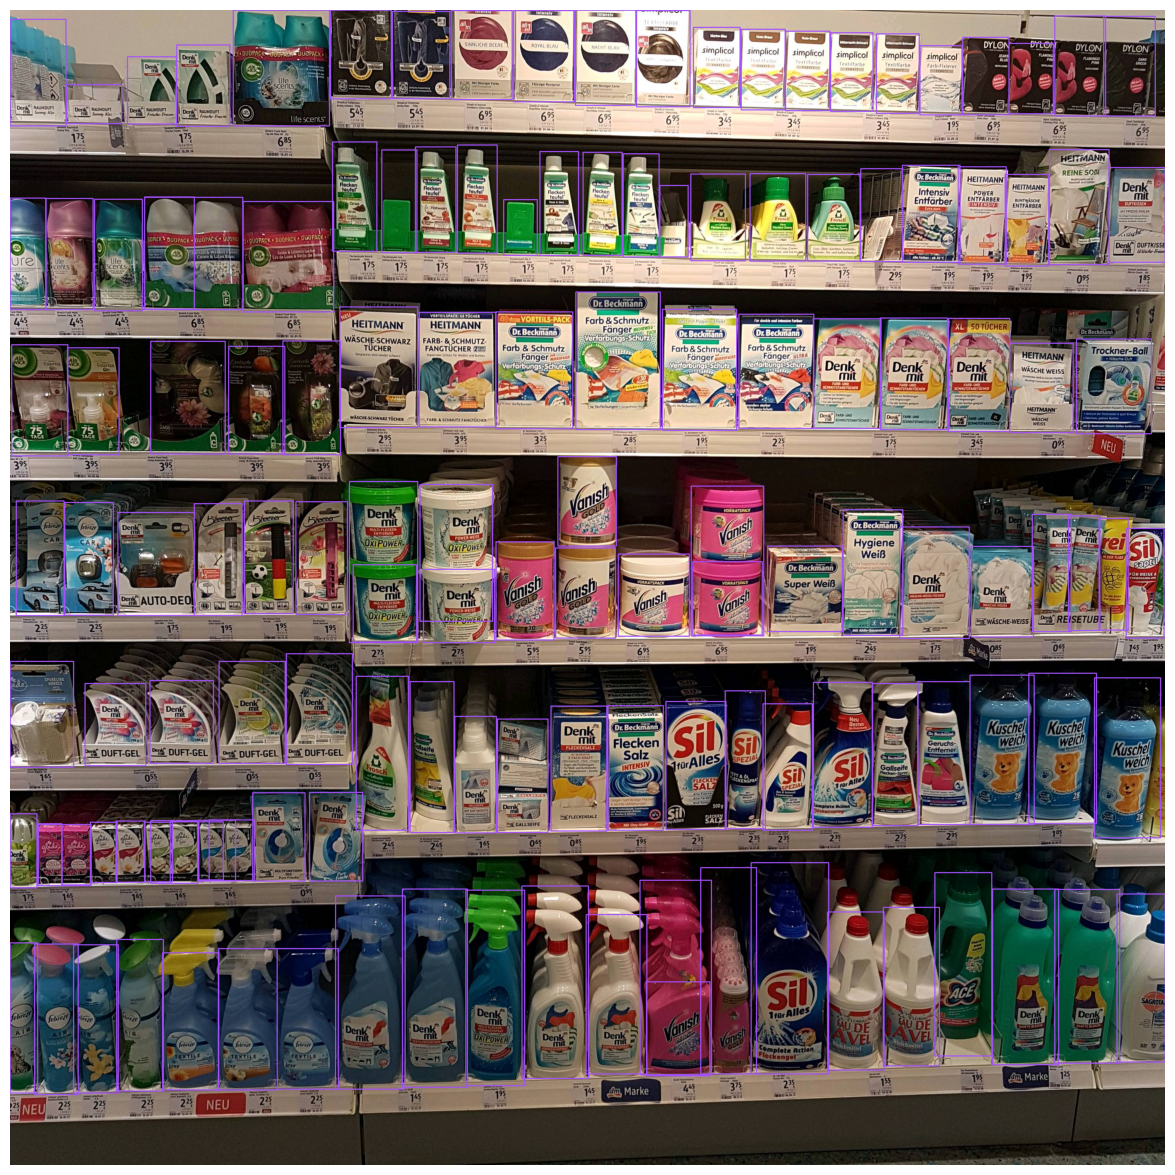

In [16]:
image = cv2.imread(np.random.choice(images))
result = list(best_model.predict(image, conf=0.5))[0]

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    skip_label=True
)

%matplotlib inline
sv.plot_image(annotated_frame, (15, 15))